### Predict Proba used the VGG Model

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from vgg16 import VGG_16

In [2]:
train_file = "Dataset\Dataset_Fashion(11-Label).csv"
test_file  = "Dataset\Testing(11 Label).csv"

train_data = pd.read_csv(train_file,index_col=0)
test_data = pd.read_csv(test_file,index_col=0)

In [3]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 11
TEST_SIZE = 0.1
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

In [4]:
# data preprocessing
from tensorflow.keras.utils import to_categorical
def data_preprocessing(raw):
    out_y = to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [5]:
X_train, y_train = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [6]:
load_VGG16_from_weight=VGG_16()
load_VGG16_from_weight.load_weights(r'Model\Weight-model_VGG16-01.h5')
load_VGG16_from_weight.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
score_load_VGG16 = load_VGG16_from_weight.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_load_VGG16[0])
print('Test accuracy:', score_load_VGG16[1])

Test loss: 0.0614214725792408
Test accuracy: 0.9863636493682861


In [30]:
predict_proba=load_VGG16_from_weight.predict(X_test)
predicit_class_indices=predict_proba.argmax(axis=1)
predicit_class_indices    

7/7 [==============================] - 0s 16ms/step


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  9,  6,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  1,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype=int64)

In [31]:
class_labels = y_test.argmax(axis=1)
class_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype=int64)

- 0   =>  Ankle Boot
- 1   => Bag
- 2   =>  Coat
- 3   =>  Dress
- 4   =>  Hat
- 5   =>  Sandal
- 6   =>  Shirt
- 7   =>  Sneaker
- 8   =>  Trouser
- 9   =>  Tshirt_Top
- 10  => Pullover 

Label 0: Accuracy = 100.00%
Label 1: Accuracy = 100.00%
Label 2: Accuracy = 100.00%
Label 3: Accuracy = 100.00%
Label 4: Accuracy = 100.00%
Label 5: Accuracy = 100.00%
Label 6: Accuracy = 85.00%
Label 7: Accuracy = 100.00%
Label 8: Accuracy = 100.00%
Label 9: Accuracy = 100.00%
Label 10: Accuracy = 100.00%


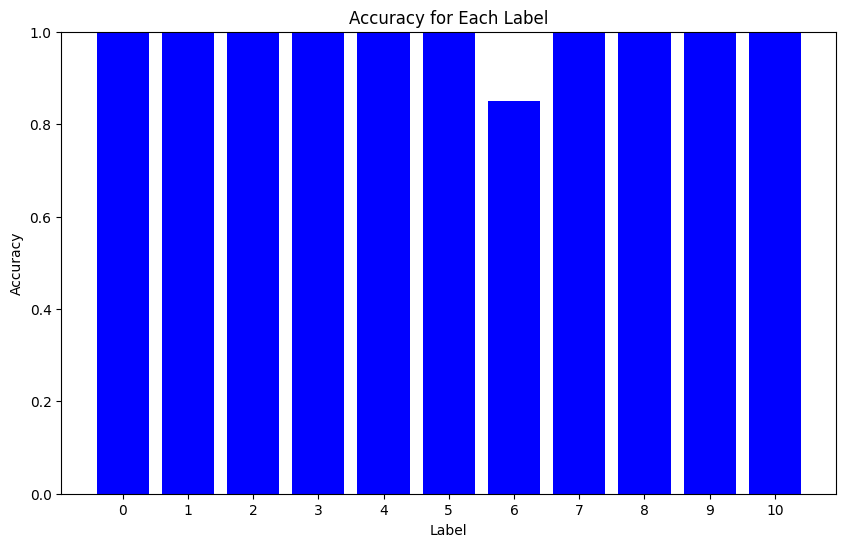

    Label  Accuracy
0       0      1.00
1       1      1.00
2       2      1.00
3       3      1.00
4       4      1.00
5       5      1.00
6       6      0.85
7       7      1.00
8       8      1.00
9       9      1.00
10     10      1.00


In [35]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Calculate accuracy for each label
accuracy_per_label = []
unique_labels = np.unique(class_labels)

for label in unique_labels:
    indices = np.where(class_labels == label)[0]
    accuracy = accuracy_score(class_labels[indices], predicit_class_indices[indices])
    accuracy_per_label.append((label, accuracy))

# Print the accuracy for each label
for label, accuracy in accuracy_per_label:
    print(f'Label {label}: Accuracy = {accuracy * 100:.2f}%')


labels, accuracies = zip(*accuracy_per_label)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Label')
plt.xticks(labels)
plt.ylim(0, 1)  # Assuming accuracy is in the range [0, 1]
plt.show()

accuracy_per_label_frame = pd.DataFrame(accuracy_per_label, columns=['Label', 'Accuracy'])
print(accuracy_per_label_frame)

In [33]:
from sklearn.metrics import classification_report
y_pred_vgg = load_VGG16_from_weight.predict(X_test)
print(classification_report(y_test.argmax(axis=1), y_pred_vgg.argmax(axis=1)))

7/7 [==============================] - 0s 27ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.85      0.92        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       0.91      1.00      0.95        20
          10       1.00      1.00      1.00        20

    accuracy                           0.99       220
   macro avg       0.99      0.99      0.99       220
weighted avg       0.99      0.99      0.99       220

